In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\576\doctorvisit.csv")
df.head()

,0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


# display complete information about the columns of the dataset such as Column name,Data type and overall memory usage

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          15 non-null     int64  
 1   visits     15 non-null     int64  
 2   gender     15 non-null     object 
 3   age        15 non-null     float64
 4   income     15 non-null     float64
 5   illness    15 non-null     int64  
 6   reduced    15 non-null     int64  
 7   health     15 non-null     int64  
 8   private    15 non-null     object 
 9   freepoor   15 non-null     object 
 10  freerepat  15 non-null     object 
 11  nchronic   15 non-null     object 
 12  lchronic   15 non-null     object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ KB


# Find out the total no.of people based on their count of illness

In [4]:
df["illness"].value_counts()

1    5
3    4
2    3
4    2
5    1
Name: illness, dtype: int64

In [5]:
df["gender"].value_counts()

male      9
female    6
Name: gender, dtype: int64

# Visualize and analyze the maximum ,minimum and medium income

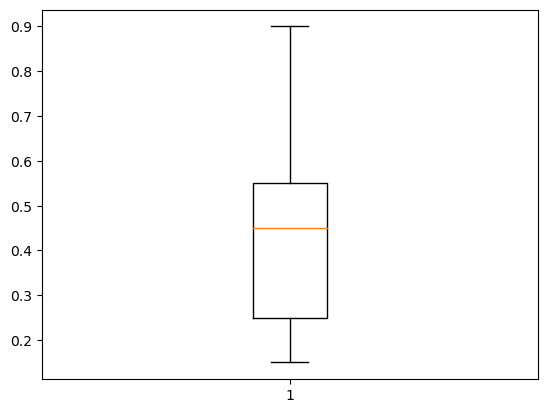

In [6]:
y=list(df.income)
plt.boxplot(y)
plt.show()

# Find out the no of days of reduced activity of male and female seperatly due to illness

In [7]:
df.groupby(['gender','reduced']).mean()

0  visits   age  income  illness    health
gender reduced                                               
female 0         8.0     1.0  0.19    0.45      3.0  4.333333
       1         6.0     1.0  0.19    0.35      5.0  9.000000
       2         2.0     1.0  0.19    0.45      1.0  1.000000
       4         1.0     1.0  0.19    0.55      1.0  1.000000
male   0         8.0     1.0  0.19    0.38      1.6  0.400000
       1        15.0     1.0  0.19    0.25      3.0  0.000000
       5         5.0     1.0  0.19    0.45      2.0  1.000000
       7        14.0     1.0  0.19    0.45      4.0  6.000000
       13       13.0     1.0  0.19    0.55      3.0  1.000000

# Visualize is there is any missing values in the dataset based on a heat map

<AxesSubplot:>

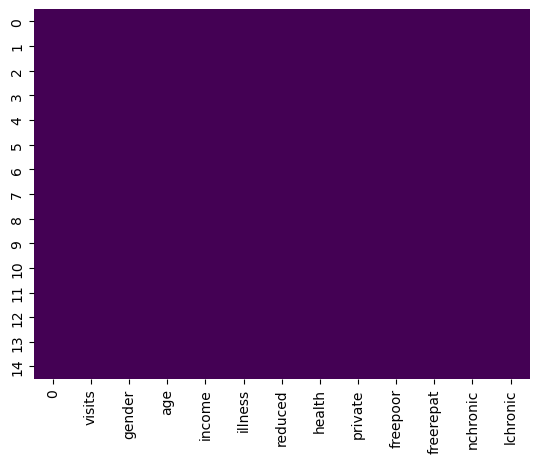

In [8]:
#missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Find out the correlation between variables in the given dataset correlation between different variables

plt.figure(figsize=(10,10)) sns.heatmap(df.corr(),cbar=True,annot=True,cmap="Blues")

<AxesSubplot:>

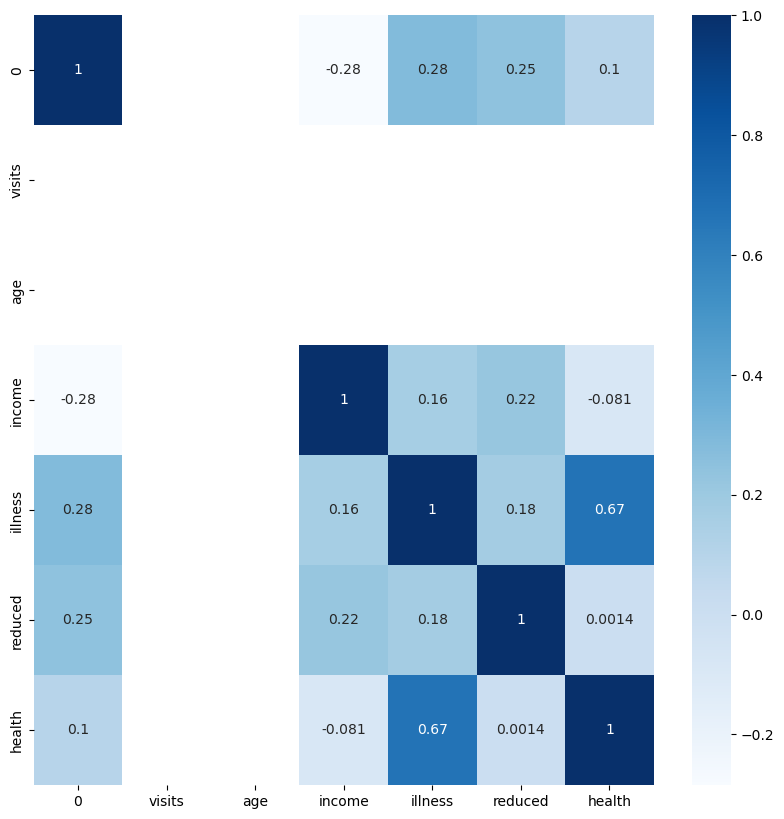

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap="Blues")

# Analyse how the income of a patient affects the no of visits to the hospital

Text(0, 0.5, 'visits')

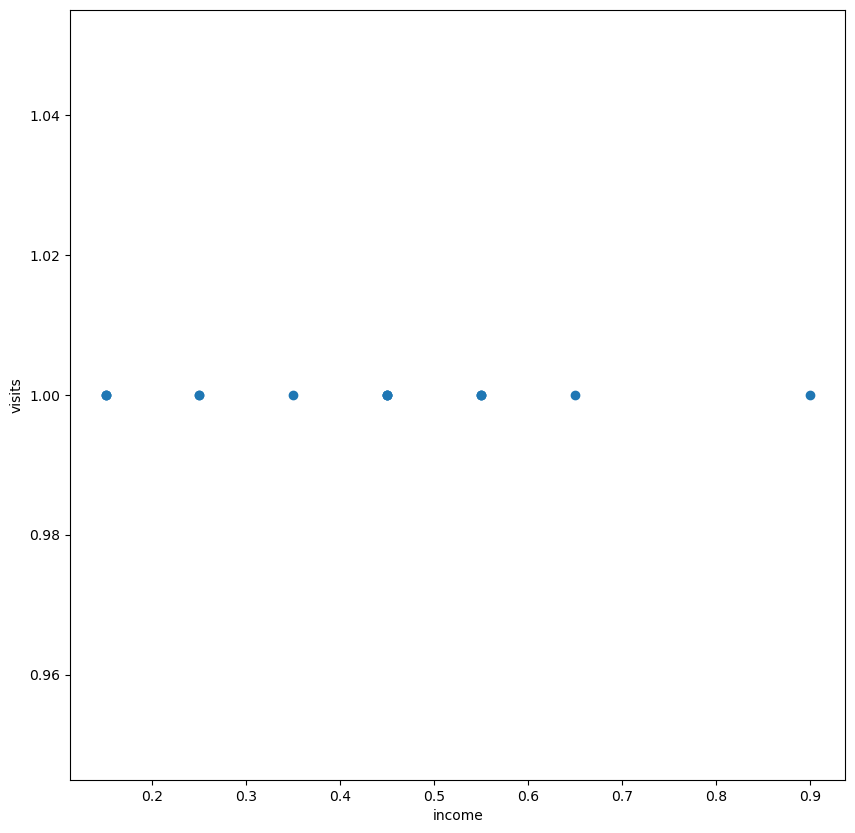

In [10]:
#relation between income and visits
plt.figure(figsize=(10,10))
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('income')
plt.ylabel('visits')

# Count and visualize the number of males and females affected by illness

<AxesSubplot:xlabel='gender', ylabel='Count'>

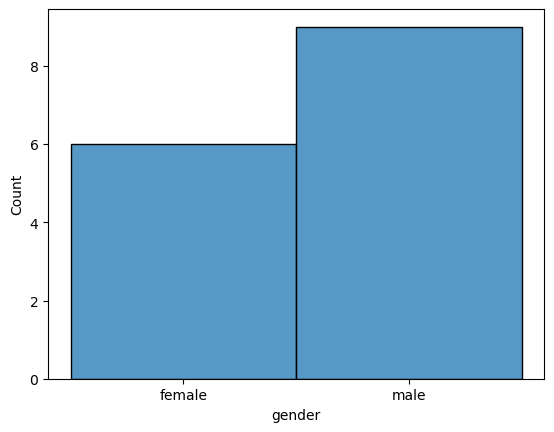

In [11]:
#No.of males and females affected by illness
sns.histplot(df.gender,bins=2)

# Visualize the percentage of people getting govt health insurance due to low income ,due to old age and aslo the percentage of people having private health insurace.

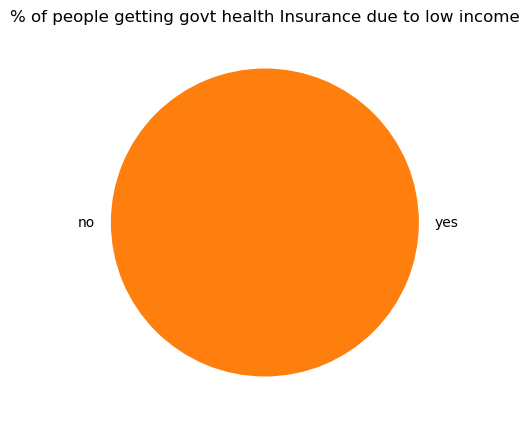

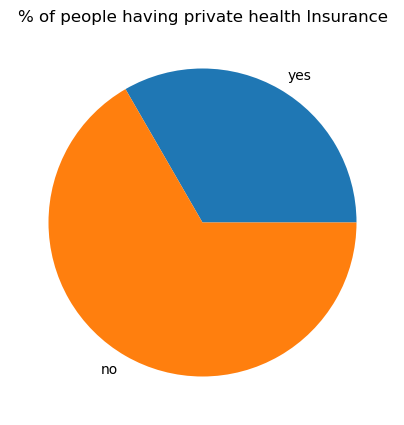

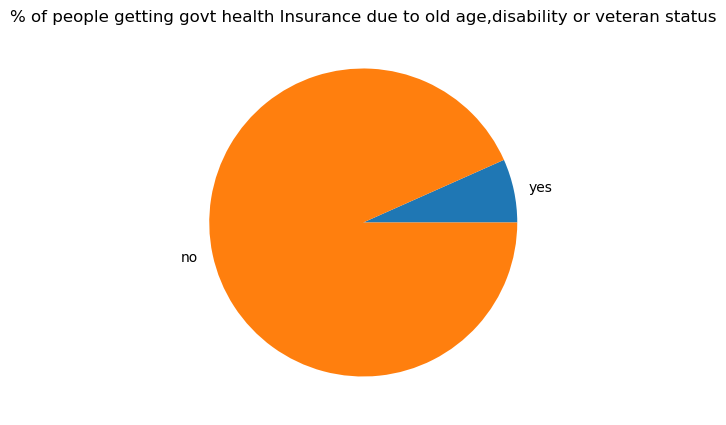

In [12]:
# % of people getting govt Insurance due to low income
label=['yes','no']
Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to low income")
plt.show()
# % of people having private Insurance
Y=df[df['private']=='yes']
N=df[df['private']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people having private health Insurance")
plt.show()
# % of people getting govt Insurance due to old age,disability or veteran status
Y=df[df['freerepat']=='yes']
N=df[df['freerepat']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to old age,disability or veteran status")
plt.show()

# Plot a horizontal bar chart to analyze the reduced days of activity due to illness based on Gender

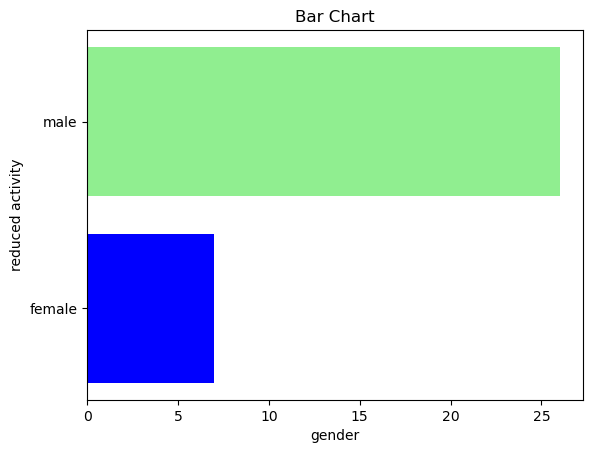

In [14]:
db=df.groupby('gender')['reduced'].sum().to_frame().reset_index()
#Creating the bar chart
plt.barh(db['gender'],db['reduced'],color=['blue','lightgreen'])
#Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('gender')
plt.ylabel('reduced activity')
#show the plot
plt.show()